# Quantum Walk 🚶‍♂️🚶‍♀️

## What is Quantum Walk?

A quantum walk is the quantum counterpart of a classical random walk. In a quantum walk, a particle (such as an electron) follows quantum rules, allowing it to exist in multiple positions simultaneously due to superposition. This leads to interference effects, making the quantum walk spread faster and cover more ground than a classical random walk. Quantum walks are used in quantum computing for developing algorithms and solving problems more efficiently than classical methods.

### Discrete-Time Quantum Walk (DTQW):
A Discrete-Time Quantum Walk (DTQW) involves a particle moving on a discrete lattice with its position and direction updated at each time step. there are its components:
1) Coin Operator
2) Shift Operator

## Goal:🏆

design the quantum walk operator for a path graph with 16 nodes.($P_{16}$)

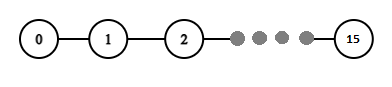

First we should import required packages

In [3]:
from classiq import *

to have 16 nodes, we need 4 qubits. 2^4=16

In [4]:
size = 4
nodes = 2**size

## Coin Operator

This operator determines the direction in which the particle will move. It acts on an internal "coin" state, which can be thought of as the particle's internal degree of freedom (like a spin). The coin operator is typically a unitary matrix (e.g., the Hadamard matrix) that creates a superposition of states, deciding the probability amplitudes for moving left or right.



In [5]:
@qfunc
def prepare_minus(x: QBit):
    X(x)
    H(x)

@qfunc
def diffuzer_oracle(aux: Output[QNum],x:QNum):
    aux^=(x!=0)

@qfunc
def zero_diffuzer(x: QNum):
    aux = QNum('aux')
    allocate(1,aux)
    within_apply(compute=lambda: prepare_minus(aux),
              action=lambda: diffuzer_oracle)

def c_iteration(i:int,vertices: QNum, adjacent_vertices:QNum):
    prob = [0]*nodes
    if i == 0:
        prob[i + 1] = 1.0
    elif i == nodes - 1:
        prob[i - 1] = 1.0
    else:
        prob[i - 1] = 0.5
        prob[i + 1] = 0.5
    print(f'Node={i}, prob vec ={prob}')
    control(ctrl=vertices==i, operand=lambda: within_apply(compute= lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices), action= lambda: zero_diffuzer(adjacent_vertices)))

@qfunc
def c_operator(vertices:QNum, adjacent_vertices: QNum):
    for i in range(nodes):
        c_iteration(i,vertices,adjacent_vertices)

## Shift Operator

This operator moves the particle based on the state of the coin. It shifts the particle's position on the lattice, moving it left or right according to the coin's outcome. The shift operator ensures that the particle's position is updated in accordance with the coin state.

In [6]:
@qfunc
def edge_oracle(res:Output[QBit], vertices: QNum, adjacent_vertices: QNum):
    res |= (((vertices - adjacent_vertices) == 1) | ((vertices - adjacent_vertices) == -1))

@qfunc
def bitwise_swap(x: QArray[QBit], y:QArray[QBit]):
    repeat(count= x.len, iteration= lambda i: SWAP(x[i],y[i]))

@qfunc
def s_operator(vertices:QNum, adjacent_vertices: QNum):
    res = QNum('res')
    edge_oracle(res,vertices,adjacent_vertices)
    control(ctrl= res==1, operand= lambda: bitwise_swap(vertices,adjacent_vertices))

## Main function

In [7]:
@qfunc
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):
    allocate(size, vertices)
    hadamard_transform(vertices)
    allocate(size, adjacent_vertices)

    c_operator(vertices, adjacent_vertices)
    s_operator(vertices, adjacent_vertices)

qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

Node=0, prob vec =[0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
Node=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
Node=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
Node=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
Node=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
Node=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
Node=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
Node=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0]
Node

## Circuit
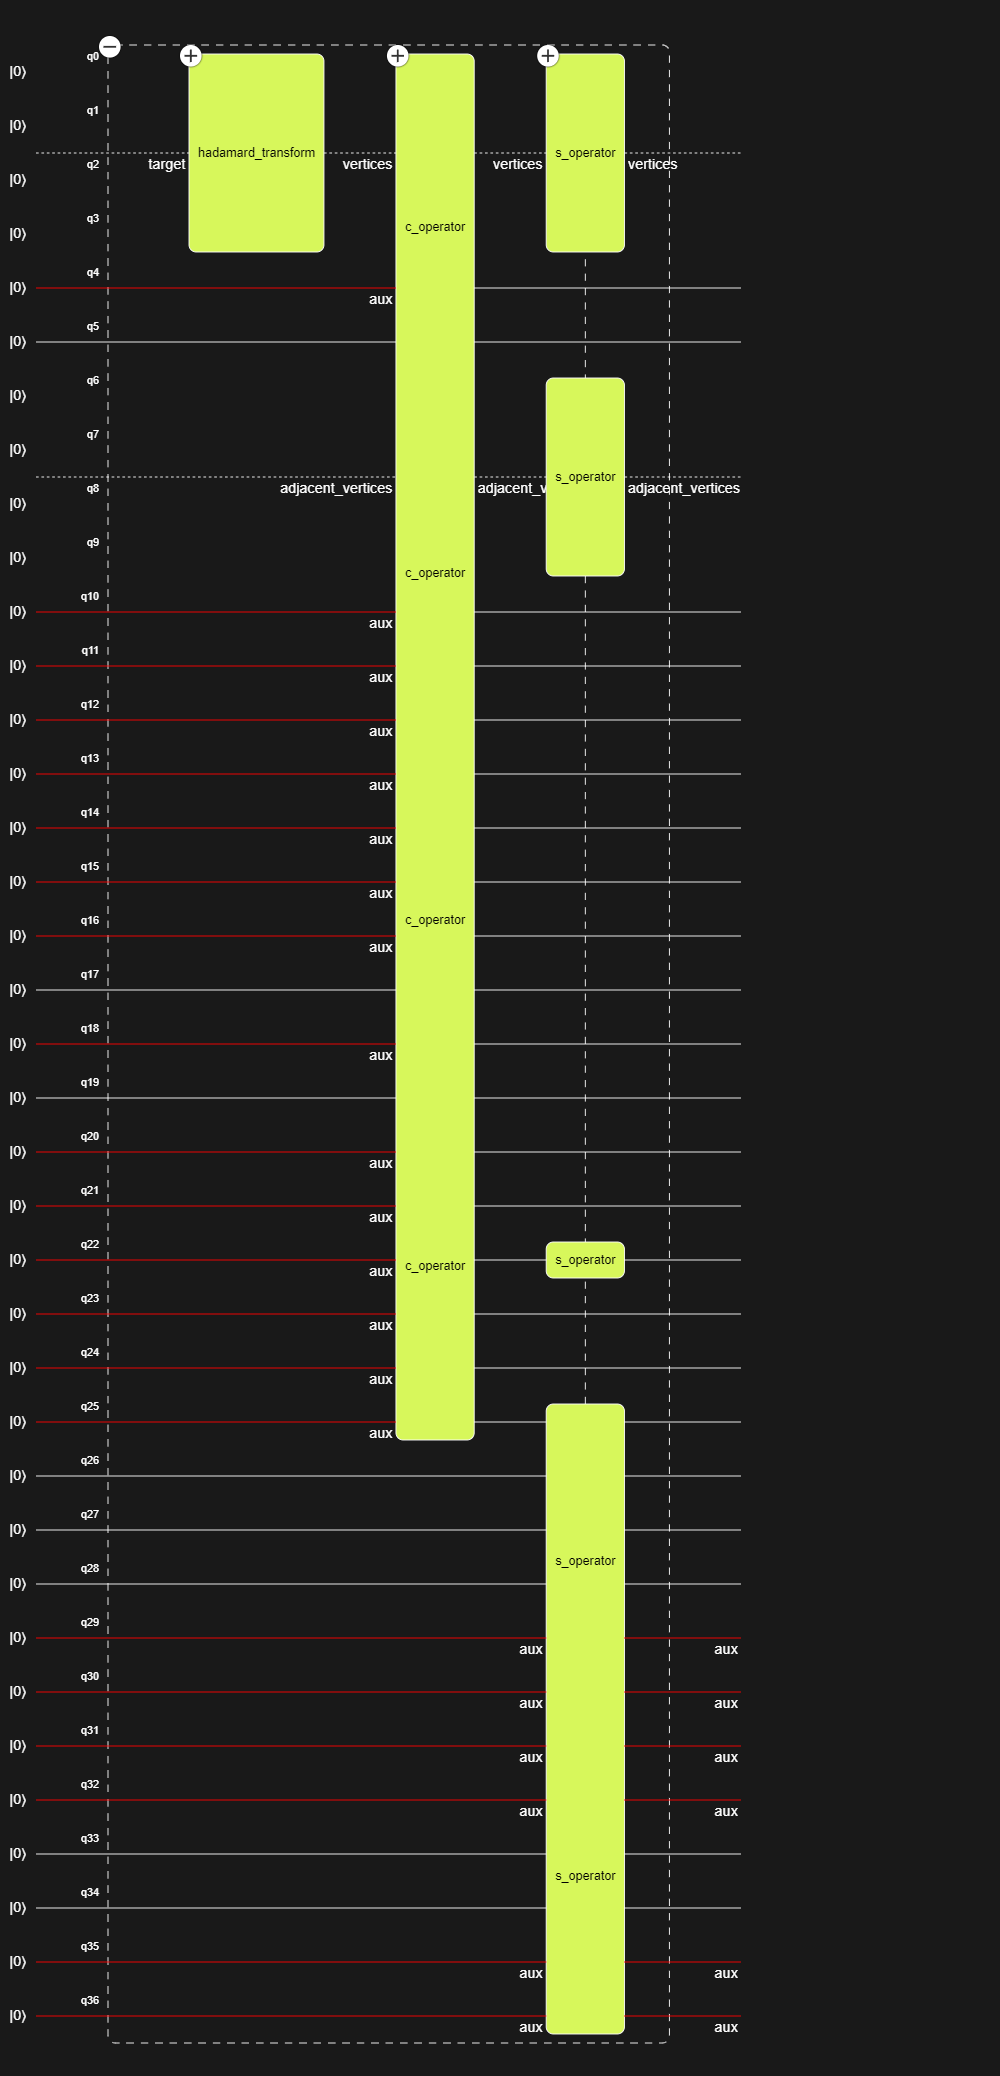